# Import the Libraries

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import exposure
from skimage import feature

from pandas import read_excel

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score


## HOG Feature Extraction

In [13]:
def get_feature_vector(image_directory, grid_q= 4, orientation= 8, ):
    img = cv2.imread(image_directory, cv2.IMREAD_GRAYSCALE)

    hog_features = hog(img, orientations= 8, pixels_per_cell= (int(img.shape[0]/grid_q), int(img.shape[1]/grid_q)),
                    cells_per_block=(1, 1), feature_vector= True)

    return hog_features

import os

# pictures_directory_list= np.zeros(0, dtype= "str")
# for (root, dirs, file) in os.walk("./pictures/"):
#     for img in file:
#         if '.png' in f:
#             pictures_directory_list= np.append(pictures_directory_list, img)


feature_matrix= []

for i in range(1, 937):
    img_dir= "./pictures/" + str(i) + ".png"
    try:
        feature_vec= get_feature_vector(img_dir, grid_q= 2)
        feature_matrix.append(feature_vec)
    except:
        pass

feature_matrix= np.array(feature_matrix)
print(feature_matrix.shape)

# np.savetxt('featurematrix2.csv', feature_matrix, delimiter=',')
print(sum(sum(feature_matrix== 0))/feature_matrix.size)
feature_matrix.shape

[ WARN:0@23236.414] global loadsave.cpp:248 findDecoder imread_('./pictures/99.png'): can't open/read file: check file path/integrity
[ WARN:0@23236.514] global loadsave.cpp:248 findDecoder imread_('./pictures/151.png'): can't open/read file: check file path/integrity
[ WARN:0@23236.663] global loadsave.cpp:248 findDecoder imread_('./pictures/276.png'): can't open/read file: check file path/integrity
[ WARN:0@23236.663] global loadsave.cpp:248 findDecoder imread_('./pictures/277.png'): can't open/read file: check file path/integrity
[ WARN:0@23236.663] global loadsave.cpp:248 findDecoder imread_('./pictures/278.png'): can't open/read file: check file path/integrity
[ WARN:0@23236.663] global loadsave.cpp:248 findDecoder imread_('./pictures/279.png'): can't open/read file: check file path/integrity
[ WARN:0@23236.670] global loadsave.cpp:248 findDecoder imread_('./pictures/288.png'): can't open/read file: check file path/integrity
[ WARN:0@23236.670] global loadsave.cpp:248 findDecoder 

(786, 32)
0.003618002544529262


(786, 32)

### Scale & PCA

In [14]:
required_variance= .9 # 90 % Variance
no_components= sum(pca.explained_variance_ratio_.cumsum() < required_variance) + 1

pca_var= PCA(no_components)
principal_matrix= pca_var.fit_transform(feature_matrix)

with open("labels.csv") as f:
    l= f.read()
    try: # Mac
        int(l[1:2])
        l= l[1:]
    except: # Windows
        l= l[3:]
    
    labels= np.array(l.split(), dtype= int)

nonzero_index= labels!= 0
labels= labels[nonzero_index]
principal_matrix= principal_matrix[nonzero_index]


In [16]:
X_train, X_test, y_train, y_test= train_test_split(principal_matrix, labels, test_size= .2, random_state= 42)
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

svr= SVR(C= 100, gamma= .1, epsilon= .1)

param_grid = [
  {'C': np.logspace(1, 4, 7), 'kernel': ['linear']},
  {'C': np.logspace(1, 4, 7), 'gamma': np.logspace(-1, -4, 7), 'kernel': ['rbf']},
 ]

model= GridSearchCV(svr, param_grid= param_grid)

In [17]:
model.fit(X_train, y_train)
print(model.cv_results_)

y_pred= model.predict(X_test)

mae= mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

(0.0, 180.0, 0.0, 180.0)

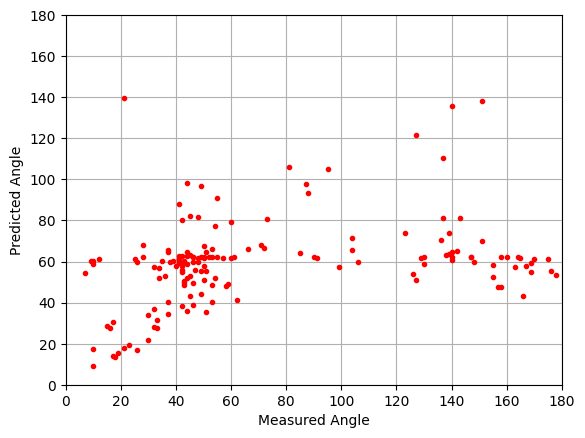

In [ ]:
plt.plot(y_test, y_pred, "r.")
plt.grid()
plt.xlabel("Measured Angle")
plt.ylabel("Predicted Angle")
plt.axis([0, 180, 0, 180])